In [1]:
import sys
sys.path.append('../../n-mer-model/src/')
import MC_wrapper
import matplotlib.pyplot as plt
from matplotlib import colormaps
viridis = colormaps['viridis']
plasma = colormaps['plasma']
import numpy as np

In [2]:
E_1,E_2 = 1.,0.
Interactions = [[0.,0.,0.],[0.,E_1,0.],[0.,0.,E_2]]
Evalence=0
nparticles = 100
size= 32

# Check that the system does not aggregate with 0 interaction energy

In [4]:
mc = MC_wrapper.MC(size,nparticles,0,0,Interactions,Evalence,1.)
t_lag = 10**3
t_tot = 10**6
E0 = np.zeros(t_tot//t_lag)
n_c0 = np.zeros(t_tot//t_lag)
for t in range(t_tot//t_lag):
    e = 0
    nc = 0
    for step in range(t_lag):
        success = mc.monte_carlo_step()
        e +=mc.get_energy()

    E0[t] = e/t_lag

polymer successfully generated
particles successfully added


# Check that the system has enough time to equilibrate when fully clutering

In [ ]:

E_list = [1,1.1,1.2,1.3,1.4]
E_2 = 10.
Evalence=0
t_lag = 10**3
t_tot = 10**6

E = np.zeros((len(E_list),t_tot//t_lag))
n_c = np.zeros((len(E_list),t_tot//t_lag))


for n,E_1 in enumerate(E_list):
    Interactions = [[0.,0.,0.],[0.,E_1,0.],[0.,0.,E_2]]
    mc = MC_wrapper.MC(size,nparticles,0,0,Interactions,Evalence,1.,seed = np.random.randint(10000))
    for t in range(t_tot//t_lag):
        e,nc = 0.,0.
        for step in range(t_lag):
            mc.monte_carlo_step()
            e += mc.get_energy()
            #nc+=np.mean(mc.get_cluster_size())
        E[n,t] = e/t_lag
        #n_c[n,t] = nc/t_lag
    MC_wrapper.plot_simulation(mc,output_filename= 'E_'+str(E_1)+'.html')

polymer successfully generated
particles successfully added


/media/hcleroy/anaconda3/lib/python3.11/site-packages/pyvista/core/utilities/points.py:55: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


: 

# Plot the equilibration of the energy and clusters

[-2470.0, -2717.0, -2964.0, -3211.0000000000005, -3458.0]


Text(0, 0.5, 'n_c/n_c_max')

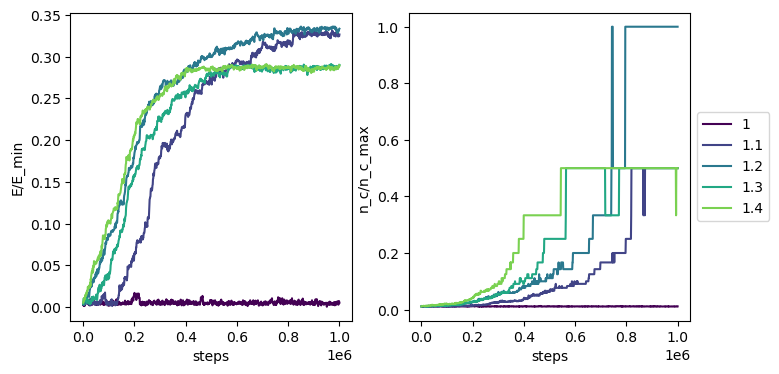

In [ ]:
# In theory, if all the interactions are satisfied the energy is:
# 26 neighbors all satisfied for the 100 particles, minus the surface tension, 
# where particles in average only have 1/2 of their neighbors. 
# The amount of particles at the surface is roughly \sqrt(Nparticles)
E_min = [- 26*E*nparticles + 26/2*E*np.sqrt(nparticles) for E in E_list]
print(E_min)

fig,ax = plt.subplots(ncols=2,figsize = (8,4))
x_t = np.linspace(0,t_tot,t_tot//t_lag) 
for n in range(len(E_list)):
    ax[0].plot(x_t,E[n]/E_min[n],color=viridis(n/len(E_list)))
    ax[1].plot(x_t,n_c[n] / nparticles,color=viridis(n/len(E_list)),label = E_list[n])

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_xlabel('steps')
ax[0].set_ylabel('E/E_min')
ax[1].set_xlabel('steps')
ax[1].set_ylabel('n_c/n_c_max')

# There are some ergodicity breaking at E = 10

In [8]:
Interactions = [[0.,0.,0.],[0.,E_1,0.],[0.,0.,E_2]]
mc = MC_wrapper.MC(size,nparticles,0,0,Interactions,Evalence,1.,seed = np.random.randint(10000))
mc.monte_carlo_steps(100000)

polymer successfully generated
particles successfully added


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 Tru